# Análise Exploratória de Dados

#### Conjunto de dados explorado : [Forbes Highest Paid Athletes 1990-2020](https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019) 

#### Autoria de [Rafael Galdino da Silva](https://github.com/rafaelsilva81)

## 1 - Descrição dos Dados

### 1.1 Contexto
O Conjunto de dados em questão se trata de uma lista dos atletas esportivos mais bem-pagos de acordo com a revista Forbes entre os anos de 1990 a 2019.
O conjunto contém 301 instâncias e 8 variáveis. Uma amostra dos dados é reproduzida abaixo.

In [155]:
# Importação das bibliotecas necessárias
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Realizando leitura do arquivo
df = pd.read_csv('../../data/raw/atividade-05/richest_athletes.csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


### 1.2 Análise de variáveis
 | VARIÁVEL | TIPO  |  CLASSIFICAÇÃO |
 |--|--| -- |
 | `Name`  | `String` | Qualitativa Nominal |
 | `Nationality` | `String` | Qualitativa Nominal |
 | `Sport` | `String` | Qualitativa Nominal |
 | `Year` | `Integer`| Quantitativa Discreta |
 | `Current_Rank`| `Integer` | Quantitativa Discreta |
 | `Previous_Year_Rank`| `String` | Quantitativa Discreta |
 | `Earnings`  | `Float`| Quantitativa Contínua 

### 1.3 Observações
 - A variável `S.NO` presente no conjunto de dados foi desconsiderada pois ela indica apenas a linha atual
 - Não há registros para o ano de 2001
 - A variável `Sport` não está bem formatada
 - A variável `Earnings` já está em um valor simplificado (Milhões de dólares)
 - A variável `Year` é considerada discreta pois o conjunto de anos possíveis dentro do conjunto de dados é finito.
 - A variável `Previous_Year_Rank` foi denominada como `String` pois a coluna não é consistente dentro do conjunto, apresentando campos vazios e campos com caracteres.

## 2 - Perguntas de Partida e Hipóteses

A partir dos dados obtidos, é possível realizar algumas perguntas e hipóteses:

**Perguntas**
 - Qual o país mais/menos recorrente?
 - Quais anos trouxeram mais/menos ganhos?
 - Quanto ganham os atletas mais bem pagos?

 **Hipóteses**
 - O ganho total é maior em anos em que ocorrem grandes eventos esportivos (Copa do Mundo e Olimpíadas)
 - O ganho dos atletas tem tendência a aumentar anualmente
 
 A partir dessas perguntas e hipóteses, é possível formular gráficos e tabelas que nos ajudam a entender como esse conjunto de dados está organizado.

## 3 - Insights

Antes de realizarmos os Insights, alguns ajustes serão necessários:

In [156]:
#Ajustando o dataframe
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True) #Removendo a coluna S.NO (index)
df1['Sport'] = df1['Sport'].str.title() #Convertendo a coluna Sport para titlecase

df1.set_index('Year', inplace=True)

### 3.1 Qual país aparece possui mais/menos ocorrências no ranking?

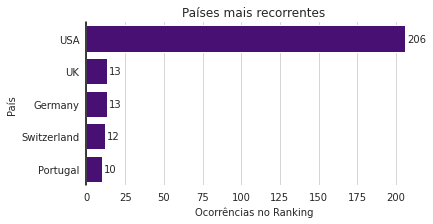

In [157]:
plt.figure(figsize=(6,3))
sns.set_style("whitegrid")
ax = sns.barplot(data=df1, x=df1.Nationality.value_counts().to_frame().values.flatten()[:5], y=df1.Nationality.value_counts().to_frame().index.tolist()[:5], color='indigo')

plt.xlabel('Ocorrências no Ranking')
plt.ylabel('País')
plt.title('Países mais recorrentes')
labels = ax.bar_label(
    ax.containers[0],
    padding = 2.0
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

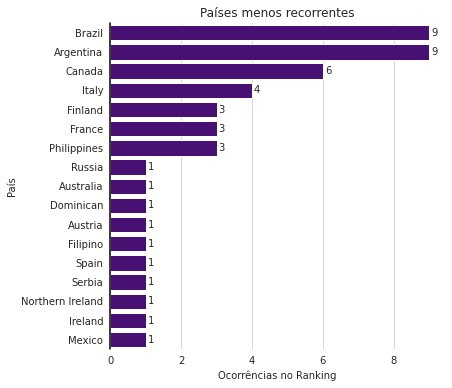

In [158]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df1, x=df1.Nationality.value_counts().to_frame().values.flatten()[5:], y=df1.Nationality.value_counts().to_frame().index.tolist()[5:], color='indigo')

plt.xlabel('Ocorrências no Ranking')
plt.ylabel('País')
plt.title('Países menos recorrentes')
labels = ax.bar_label(
    ax.containers[0],
    padding = 2.0
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

Dessa forma, é possível análisar que :
- Os EUA possuem uma quantidade muito superior de atletas no ranking durante esses anos comparado a outros países;
- Russia, Austrália, República Dominicana, Áustria, Filipinas, Espanha, Sérvia, México, Irlanda e Irlanda do Norte são os países menos representados no ranking com apenas uma ocorrência

#### 3.1.1 Atletas dos países menos representados:

In [159]:
lowest_represented_countries = ['Russia', 'Australia', 'Dominican', 'Austria', 'Filipino', 'Spain', 'Serbia', 'Ireland', 'Northern Ireland', 'Mexico']
df2 = df1.copy()
df2 = df2.loc[df2['Nationality'].isin(lowest_represented_countries)] 
df2[['Name', 'Nationality', 'earnings ($ million)', 'Sport']].sort_values(by='Year')

,Name,Nationality,earnings ($ million),Sport
Year,,,,
1990,Greg Norman,Australia,8.5,Golf
1994,Gerhard Berger,Austria,13.5,Auto Racing
1998,Sergei Federov,Russia,29.8,Ice Hockey
2011,Alex Rodriguez,Dominican,35.0,Baseball
2012,Manny Pacquiao,Filipino,62.0,Boxing
2014,Rafael Nadal,Spain,44.5,Tennis
2016,Novak Djokovic,Serbia,55.8,Tennis
2017,Rory McIlroy,Northern Ireland,50.0,Golf
2018,Conor McGregor,Ireland,99.0,Mma


### 3.2 Ganhos totais por País

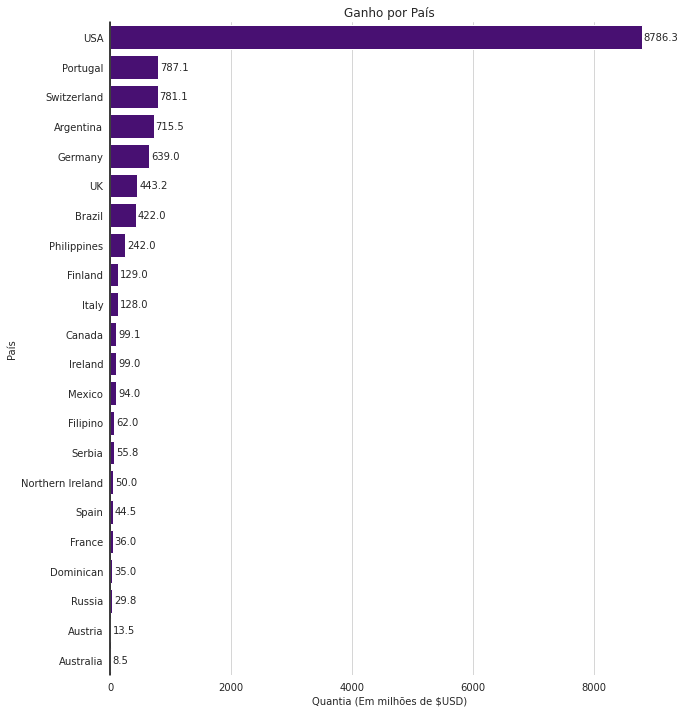

In [171]:
df4 = df1[['Nationality', 'earnings ($ million)']]
df4 = df4.groupby('Nationality').sum().sort_values(by='earnings ($ million)', ascending=False)

plt.figure(figsize=(10,12))
sns.set_style("whitegrid")
ax = sns.barplot(data=df4, y=df4.index, x=df4['earnings ($ million)'], color='indigo')

plt.xlabel('Quantia (Em milhões de $USD)')
plt.ylabel('País')
plt.title('Ganho por País')
labels = ax.bar_label(
    ax.containers[0],
    fmt='%.1f', #1 casa decimal
    padding = 2.0
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

### 3.3 Ganhos totais por ano

In [172]:
df5 = df1[['earnings ($ million)']]
df5 = df5.groupby('Year').sum().sort_values(by='earnings ($ million)', ascending=False)
df5.head()

,earnings ($ million)
Year,
2018,1059.4
2015,950.3
2019,941.4
2020,819.2
2014,642.4


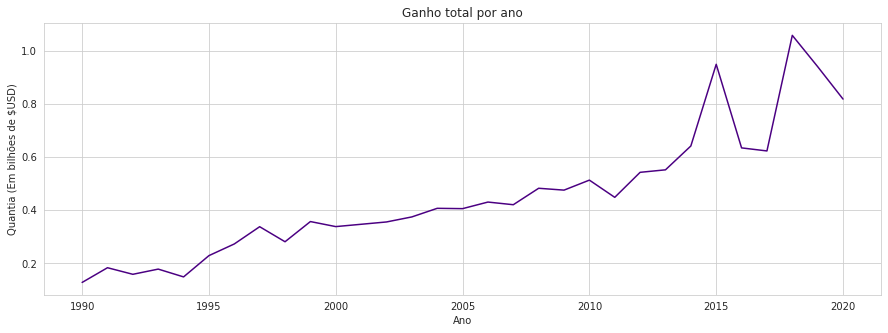

In [173]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax = sns.lineplot(data=df5, x=df5.index, y=df5['earnings ($ million)']/1000, color='indigo')

plt.xlabel('Ano')
plt.ylabel('Quantia (Em bilhões de $USD)')
plt.title('Ganho total por ano')

plt.show()

Dessa forma, sem se aprofundar muito, apenas pela visualização do gráfico é cabível afirmar que atletas vem ganhando mais com o passar dos anos.

### 3.5 Ganhos em anos de Copa do Mundo e Olimpíadas

In [174]:
anos_copa = [1998, 2002, 2006, 2010, 2014, 2018] #Anos de copa do mundo entre 1990 a 2020
anos_olimpiadas = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020] #Anos de olimíada entre 1990 a 2020

df_copa = df5.loc[df5.index.isin(anos_copa)] 
df_olimpiadas = df5.loc[df5.index.isin(anos_olimpiadas)]
df_excludent = df5.loc[~df5.index.isin(anos_olimpiadas + anos_copa)] #Anos em que não há Copa nem Olimpiada

In [175]:
total_avg = df5['earnings ($ million)'].mean(axis = 0)
copa_avg = df_copa['earnings ($ million)'].mean(axis = 0)
olimpiadas_avg = df_olimpiadas['earnings ($ million)'].mean(axis = 0)
excludent_avg = df_excludent['earnings ($ million)'].mean(axis = 0)

avg_data = [['All period', total_avg], ['World Cup', copa_avg], ['Olimpics', olimpiadas_avg], ['No events', excludent_avg]]
df6 = pd.DataFrame(avg_data, columns=['Period', 'Average Earning'])

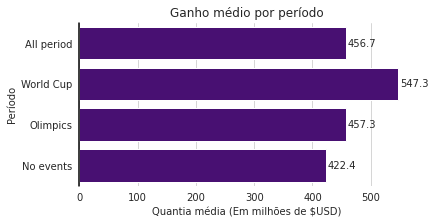

In [176]:
plt.figure(figsize=(6,3))
sns.set_style("whitegrid")
ax = sns.barplot(data=df6, y=df6['Period'], x=df6['Average Earning'], color='indigo')

plt.xlabel('Quantia média (Em milhões de $USD)')
plt.ylabel('Período')
plt.title('Ganho médio por período')
labels = ax.bar_label(
    ax.containers[0],
    fmt='%.1f', #1 casa decimal
    padding = 2.0
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

Com base nos dados, é posível notar que em a média de ganho dos atletas é maior em anos de copa do mundo e olimpíadas, especialmente quando comparado com anos em que não há nenhum desses eventos.

### 3.6 Atleta mais/menos bem pago

In [177]:
df8 = df1[['Name', 'earnings ($ million)']]
df8 = df8.groupby('Name').sum().sort_values(by='earnings ($ million)', ascending=False)

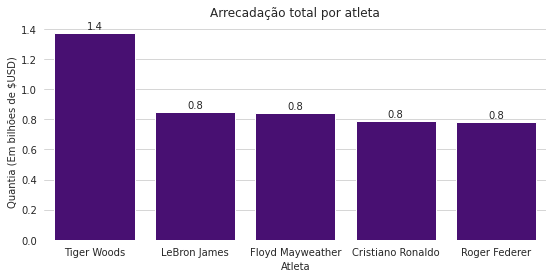

In [178]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")
ax = sns.barplot(data=df8, x=df8.index[:5], y=df8['earnings ($ million)'][:5]/1000, color='indigo')

plt.xlabel('Atleta')
plt.ylabel('Quantia (Em bilhões de $USD)')
plt.title('Arrecadação total por atleta')
labels = ax.bar_label(
    ax.containers[0],
    fmt='%.1f', #1 casa decimal
    padding = 2.0
)
ax.set(frame_on=False)
plt.show()

### 3.7 Esporte mais bem pago

In [179]:
df9 = df1[['Sport', 'earnings ($ million)']]
df9 = df9.groupby('Sport').sum().sort_values(by='earnings ($ million)', ascending=False)

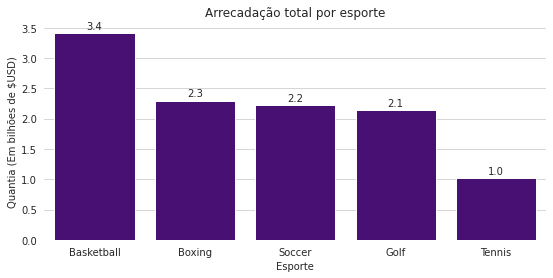

In [180]:
plt.figure(figsize=(9,4))
sns.set_style("whitegrid")
ax = sns.barplot(data=df9, x=df9.index[:5], y=df9['earnings ($ million)'][:5]/1000, color='indigo')

plt.xlabel('Esporte')
plt.ylabel('Quantia (Em bilhões de $USD)')
plt.title('Arrecadação total por esporte')
labels = ax.bar_label(
    ax.containers[0],
    fmt='%.1f', #1 casa decimal
    padding = 2.0
)
ax.set(frame_on=False)
plt.show()